In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Information

In [84]:
data = pd.read_csv("london_crime_by_lsoa.csv")

###### 5 Data teratas

In [6]:
data.head() 

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


###### 5 Data paling bawah

In [7]:
data.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


###### Informasi mengenai dataset

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


###### Memuat informasi mengenai jumlah data, rata-rata, standar deviasi(std), nilai minimum, nilai kuartil pertama, kedua(median), dan kuartil ketiga, serta nilai maksimum

In [47]:
data.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


###### Memuat jumlah data dari masing-masing variabel, dimana terdapat 33 wilayah, 9 jenis major category, 32 jenis minor category, terjadi dalam 9 tahun dengan rentang 2008-2016, serta terdapat 12 bulan.

In [48]:
data.nunique()

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [50]:
df = data.groupby(['year','borough']).size().reset_index(name='count_year')
print(df)
print(df.columns)

     year               borough  count_year
0    2008  Barking and Dagenham       34560
1    2008                Barnet       63648
2    2008                Bexley       42852
3    2008                 Brent       54516
4    2008               Bromley       58212
..    ...                   ...         ...
292  2016                Sutton       35832
293  2016         Tower Hamlets       45792
294  2016        Waltham Forest       45144
295  2016            Wandsworth       55404
296  2016           Westminster       40740

[297 rows x 3 columns]
Index(['year', 'borough', 'count_year'], dtype='object')


In [15]:
crime_major = data.drop(["lsoa_code","borough","minor_category","month"], axis=1)
crime_major = crime_major.set_index("year").groupby("major_category").sum()
crime_major = crime_major.sort_values(by="value", ascending=False)
crime_major

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


###### Pengecekan missing value dataset

In [9]:
data.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

## Visualisazing Data

### Area Plot

#### Q : Wilayah London mana yang memiliki tingkat kriminal paling tinggi dari rentang tahun 2008-2016?

In [10]:
crime_borough = data.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
crime_borough = crime_borough.set_index("year").groupby("borough").sum()
crime_borough = crime_borough.sort_values(by="value", ascending=False)
crime_borough

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


###### Data diatas merupakan jumlah kejadian kriminal dari masing-masing wilayah

###### Kemudian tabel dibawah menunjukkan 7 wilayah dengan jumlah kriminalitas paling tinggi di London

In [11]:
df= crime_borough.nlargest(7, 'value')
df

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562


###### Berikut merupakan jumlah kriminalitas tiap tahun dari 7 wilayah teratas dengan jumlah tertinggi

In [12]:
df1 = data.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df1 = df1.loc[df.index]
df1 = pd.pivot_table(df1, values="value", aggfunc=np.sum, index="year", columns="borough")
df1

borough,Camden,Croydon,Ealing,Lambeth,Newham,Southwark,Westminster
year,,,,,,,
2008,32010,29516,28947,31717,29752,33470,47846
2009,31612,29784,28617,31225,28610,30623,48456
2010,31804,29373,31360,31671,30728,31320,48116
2011,33956,29830,29537,33224,27978,30723,54243
2012,31472,30189,28832,33473,30067,30737,59226
2013,28435,27444,25917,31868,27577,31128,53852
2014,27198,27357,24978,31765,28005,28912,47564
2015,29477,28089,26247,33164,29217,30260,47395
2016,29183,28712,27127,34071,30090,31636,48330


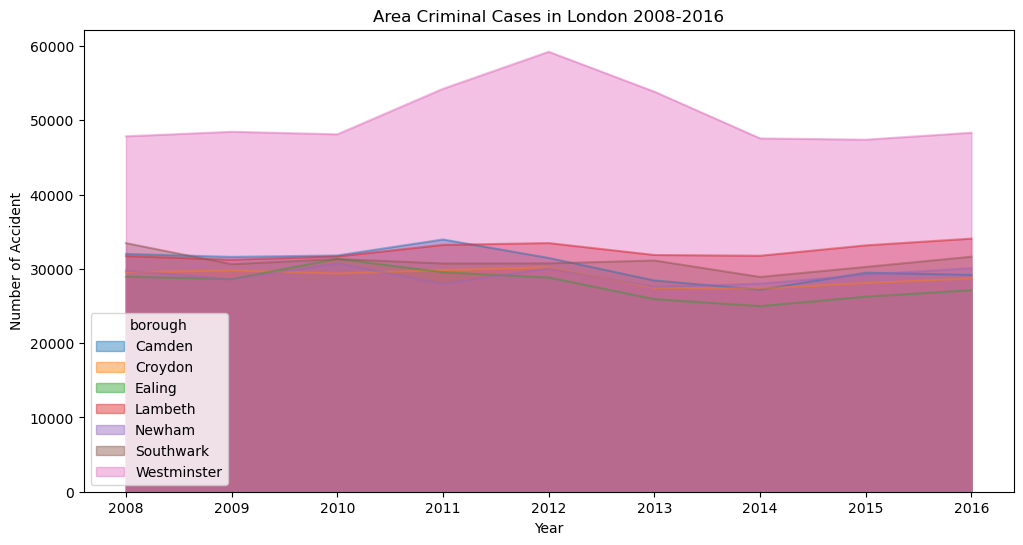

In [128]:
df1.plot(kind='area',
                 stacked=False,
                 figsize=(12,6),
                 alpha = 0.45)


plt.xlabel('Year')
plt.ylabel('Number of Accident')
plt.title('Area Criminal Cases in London 2008-2016')

plt.show()


###### Dapat disimpulkan bahwa wilayah dengan tingkat kriminalitas paling tinggi dari tahun 2008-2016 terjadi di Westminster dengan 455028 kasus dan terjadi paling tinggi di tahun 2012. 

### Histogram

#### Q : Wilayah di London yang mengalami tingkat kriminalitas paling rendah dari tahun 2008-2016?

In [14]:
df2=crime_borough.nsmallest(7, 'value')
df2

,value
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136
Merton,115654
Harrow,116848


###### Data diatas merupakan 7 wilayah di London yang mengalami tingkat kriminalitas paling rendah

###### Sedangkan data dibawah ini merupakan data kriminalitas tiap tahun dari tahun 2008-2016 dari 7 wilayah dengan tingkat kriminalitas paling rendah

In [16]:
df3 = data.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df3 = df3.loc[df2.index]
df3 = pd.pivot_table(df3, values="value", aggfunc=np.sum, index="year", columns="borough")
df3

borough,Bexley,City of London,Harrow,Kingston upon Thames,Merton,Richmond upon Thames,Sutton
year,,,,,,,
2008,15305,0,13774,10661,13875,11106,12943
2009,14445,0,13948,10163,13561,10618,12240
2010,13166,0,13945,10171,13595,10601,12032
2011,11325,69,12801,10155,13548,10896,11068
2012,11669,157,12803,9956,12856,11168,10948
2013,11552,110,11914,9191,11595,10439,10057
2014,11844,115,11909,9288,11596,10456,10443
2015,11990,151,12601,9738,12273,10413,10598
2016,12840,178,13153,9983,12755,11074,10658


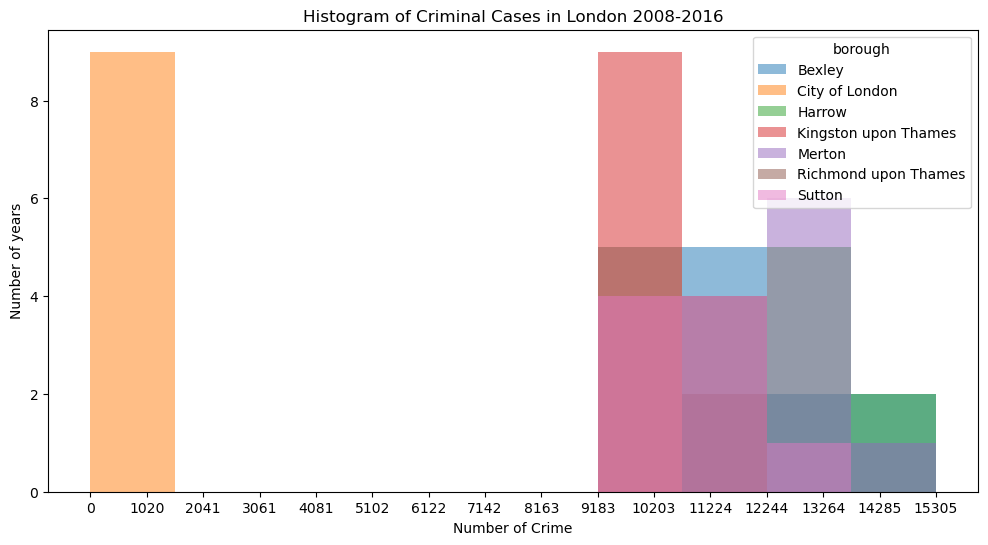

In [136]:
count, bin_edges = np.histogram(df3, 15)
df3.plot(kind='hist',
         figsize=(12,6),
         xticks=bin_edges,
         bins = 10,
         alpha = 0.5)

plt.xlabel('Number of Crime')
plt.ylabel('Number of years')
plt.title('Histogram of Criminal Cases in London 2008-2016')
plt.show()

###### Dari plot diatas, dapat disimpulkan bahwa City of London merupakan wilayah dengan kriminalitas paling rendah diantara wilayah-wilayah lain.

### Bar Chart

#### Q : Pada kasus Criminal Damage, kasus tertinggi terjadi pada tahun berapa?

In [17]:
df_major = data.pivot_table(values='value', index='year', columns=['major_category'], aggfunc=np.sum, fill_value=0)
df_major


major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


###### Data diatas merupakan tabel jumlah kasus major category tiap tahun 

Text(0.5, 1.0, 'Criminal Damage cases in London 2008-2016')

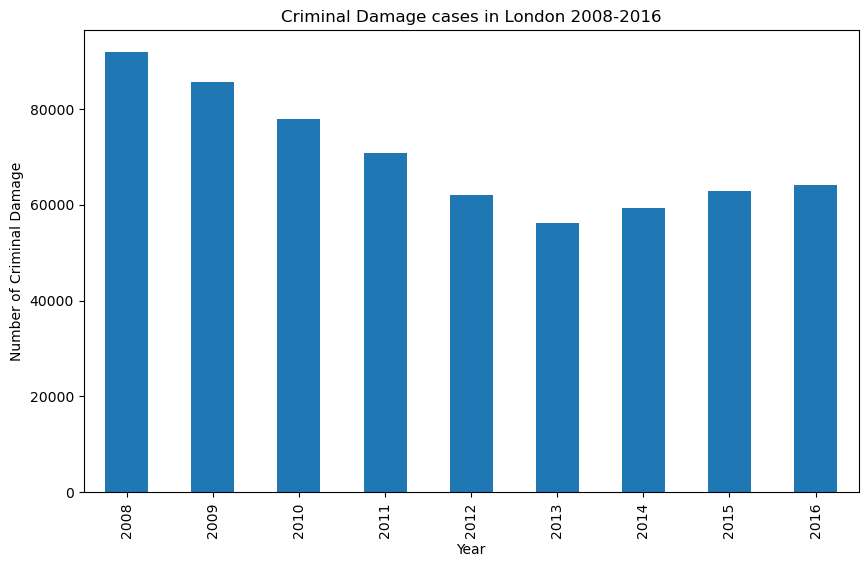

In [35]:
major_bar = df_major['Criminal Damage']
major_bar.plot(kind='bar', figsize=(10, 6))


plt.xlabel('Year') 
plt.ylabel('Number of Criminal Damage') 
plt.title('Criminal Damage cases in London 2008-2016')

###### Berdasarkan plot diatas, dapat disimpulkan bahwa criminal damage paling tinggi terjadi pada tahun 2008 dengan 91872 kasus dan paling rendah terjadi pada tahun 2013 dengan 56206 kasus

### Pie Chart

#### Q : Berapa presentase dari tiap major category/kejahatan besar di London dari tahun 2008-2016?

In [19]:
major_pie = df_major.transpose()
major_pie['total'] = df_major.sum()
major_pie

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


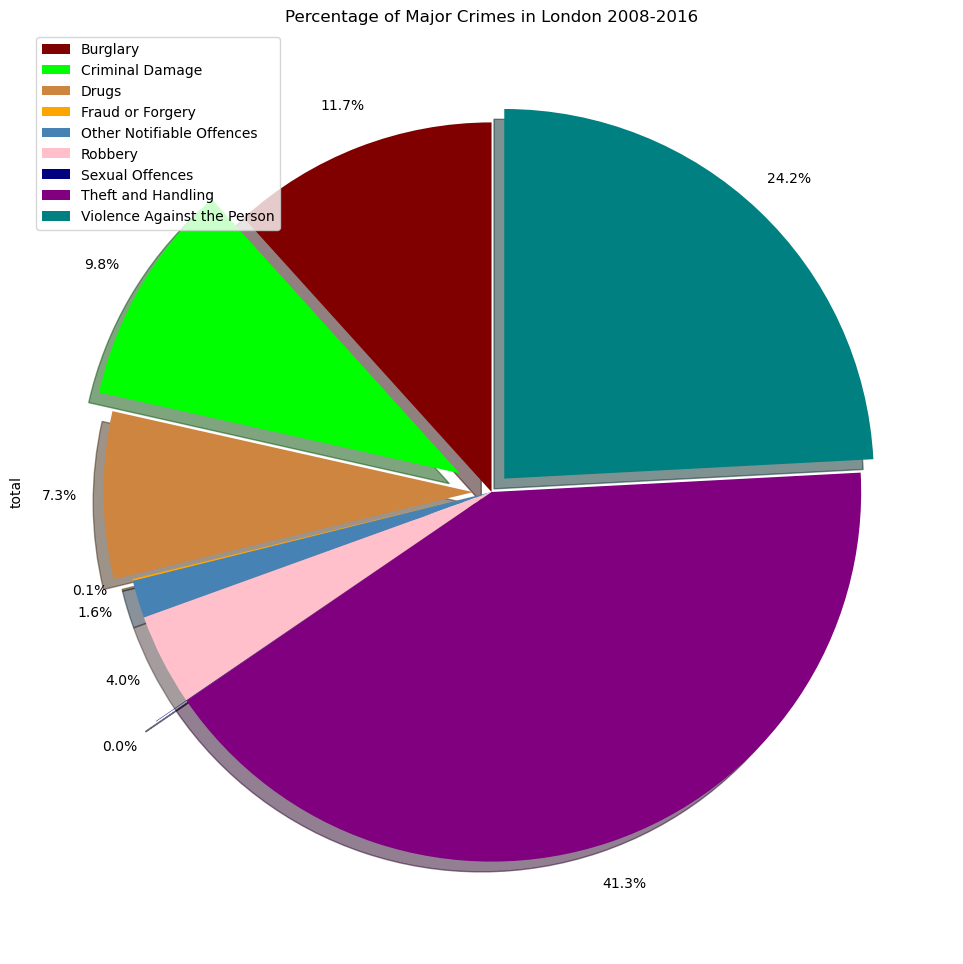

In [100]:
list_color = ["maroon", "lime", "peru", "orange", "steelblue", "pink", "navy", "purple", "teal"]
explode_list = [0, 0.1, 0.05, 0, 0, 0, 0.1, 0, 0.05]

major_pie['total'].plot(kind='pie',
                        colors=list_color,
                        figsize=(20,12),
                        startangle=90,
                        autopct='%1.1f%%',
                        shadow=True,
                        labels=None,
                        pctdistance=1.12,
                        explode=explode_list)

plt.title('Percentage of Major Crimes in London 2008-2016')
plt.legend(labels=df_major, loc="upper left")
plt.show()

###### Dari Pie chart diatas, dapat diketahui presentase kriminalitas yang terjadi di London dari tahun 2008-2016. Thef and Handling merupakan presentase tertinggi yaitu 41,3% 

### Box Plot

#### Bagaimana distribusi statistik dari Criminal Damage di London dari tahun 2008-2016?

Text(0.5, 1.0, 'Criminal Damage cases in London 2008-2016')

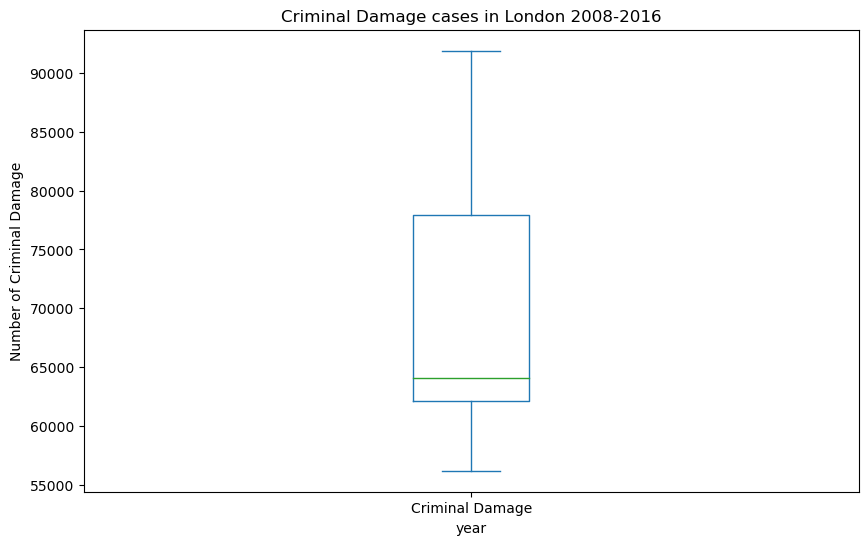

In [39]:
major_bar.plot(kind='box',
              figsize=(10,6))

plt.xlabel('year')
plt.ylabel('Number of Criminal Damage')
plt.title('Criminal Damage cases in London 2008-2016')


###### Berdasarkan Boxplot diatas dapat diketahui bahwa jumlah kriminalitas criminal damage dari tahun 2008-2016 terbesar berkisar diatas 90.000 kasus dan terendah berkisar 56.000 kasus serta nilai tengah 64.000 kasus.

### Scatter Plot

#### Q : Kasus Kriminalitas dengan jumlah tertinggi dan terendah terjadi pada bulan apa?

In [182]:
crime_month = data.drop(["lsoa_code","major_category","minor_category","borough"], axis=1).set_index("year")
crime_month = crime_month.loc[2016]
crime_month = crime_month.reset_index().drop("year", axis=1)
crime_month = crime_month.groupby("month").sum()
crime_month= crime_month.reset_index()
crime_month

,month,value
0,1,58847
1,2,56697
2,3,59167
3,4,58637
4,5,63990
5,6,62262
6,7,65519
7,8,62666
8,9,61412
9,10,63405


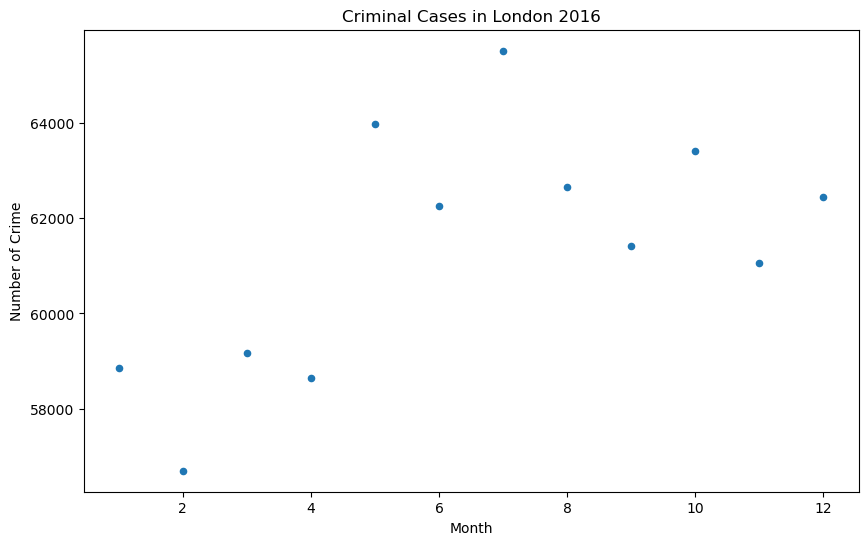

In [183]:
crime_month.plot(kind="scatter",
                 x="month",
                 y="value",
                 figsize=(10,6))

plt.xlabel("Month")
plt.ylabel("Number of Crime")
plt.title("Criminal Cases in London 2016")
plt.show()

###### Dari Scatter plot diatas dapat disimpulkan bahwa kasus kriminalitas tertinggi terjadi pada bulan ke-7 atau bulan July dan kasus kriminalitas terendah terjadi pada bulan ke-2 atau Februari.

### Word Clouds

#### Q : Bagaimana persebaran major category atau kejahatan besar di London pada tahun 2008-2016?

In [64]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [66]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [73]:
word_crime = ''.join(data.major_category)

In [76]:
wordcloud = WordCloud(width=1600, height=800,
max_font_size = 200, background_color='white')

In [77]:
wordcloud.generate(word_crime)

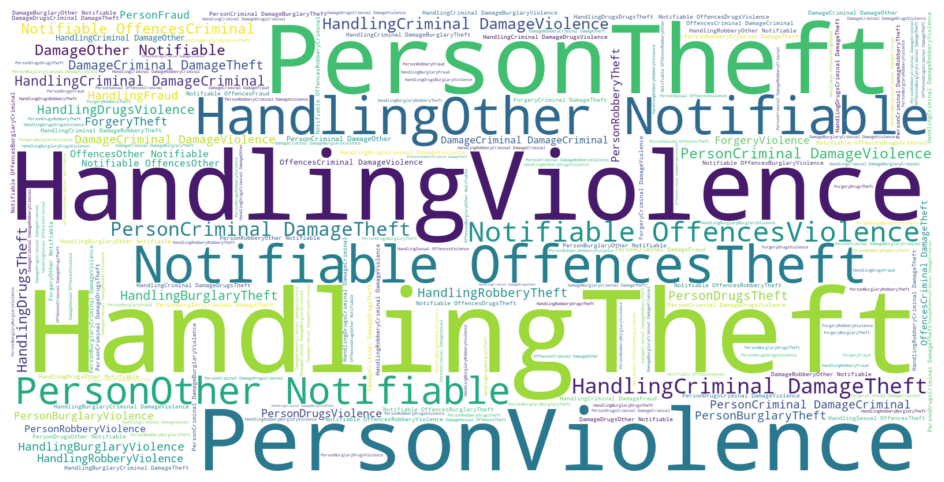

In [78]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###### Berdasarkan Word Clouds diatas dapat diketahui bahwa kriminalitas dengan kategori besar yang sering terjadi adalah Thef and Handling diikuti oleh Violence Against the person

### Follium Map

#### Q : Wilayah dengan tingkat kriminalitas tertinggi dan terendah pada tahun 2008-2016 terjadi di daerah mana?

In [114]:
import folium 
import geopandas as gpd
import datetime
from IPython.display import HTML

In [104]:
data = pd.read_csv("london_crime_by_lsoa.csv")

In [155]:
map_borough = folium.Map(location=[51.507351, -0.127758], zoom_start=12)
map_borough

###### Maps diatas merupakan wilayah London

In [153]:
crime_borough = data.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
crime_borough = crime_borough.set_index("year").groupby("borough").sum()
crime_borough = crime_borough.sort_values(by="value", ascending=False)
crime_borough

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


In [180]:
df_map = data[['borough', 'value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
map_borough = folium.Map(location=[51.507351, -0.127758], zoom_start=12)

In [181]:
folium.Choropleth(geo_data = world_geo,
                  data = df_map,
                  columns = ['borough', 'value'],
                  key_on = 'feature.properties.name',
                  fill_color = 'YlOrRd', 
                  fill_opacity = 0.5, 
                  line_opacity = 0.4,
                  legend_name = 'Criminal cases rate in London',
                  name="choropleth",
                  overlay=False,
                  show=False).add_to(map_borough)

map_borough

###### Berdasarkan maps wilayah London, dapat diketahui bahwa wilayah dengan tingkat kriminalitas tertinggi ditandai dengan warna merah yaitu wilaya westminster kemudian tingkat kriminalitas terendah ditandai dengan warna cream pucat yaitu di daerah city of London